In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('w=2')
print(df)

      z [m]   N [cm^-3]        RH  r_v [um]    q_c [g/kg]       T [K]  \
0       0.0    0.000000  0.983254       NaN  1.531496e-07  300.000000   
1       0.2    0.000000  0.983341       NaN  7.814686e-07  299.998127   
2       0.4    0.000000  0.983428       NaN  1.119379e-06  299.996240   
3       0.6    0.000000  0.983515       NaN  1.258605e-06  299.994355   
4       0.8    0.000000  0.983602       NaN  1.298038e-06  299.992469   
...     ...         ...       ...       ...           ...         ...   
996   199.2  245.478646  1.001760  7.300628  3.586065e-01  299.039649   
997   199.4  245.473980  1.001759  7.303750  3.590668e-01  299.038941   
998   199.6  245.469315  1.001758  7.306870  3.595271e-01  299.038232   
999   199.8  245.464649  1.001758  7.309986  3.599874e-01  299.037523   
1000  200.0  245.459984  1.001757  7.313100  3.604476e-01  299.036815   

             p [Pa]  
0     101300.000000  
1     101297.770589  
2     101295.541213  
3     101293.311873  
4     101291.

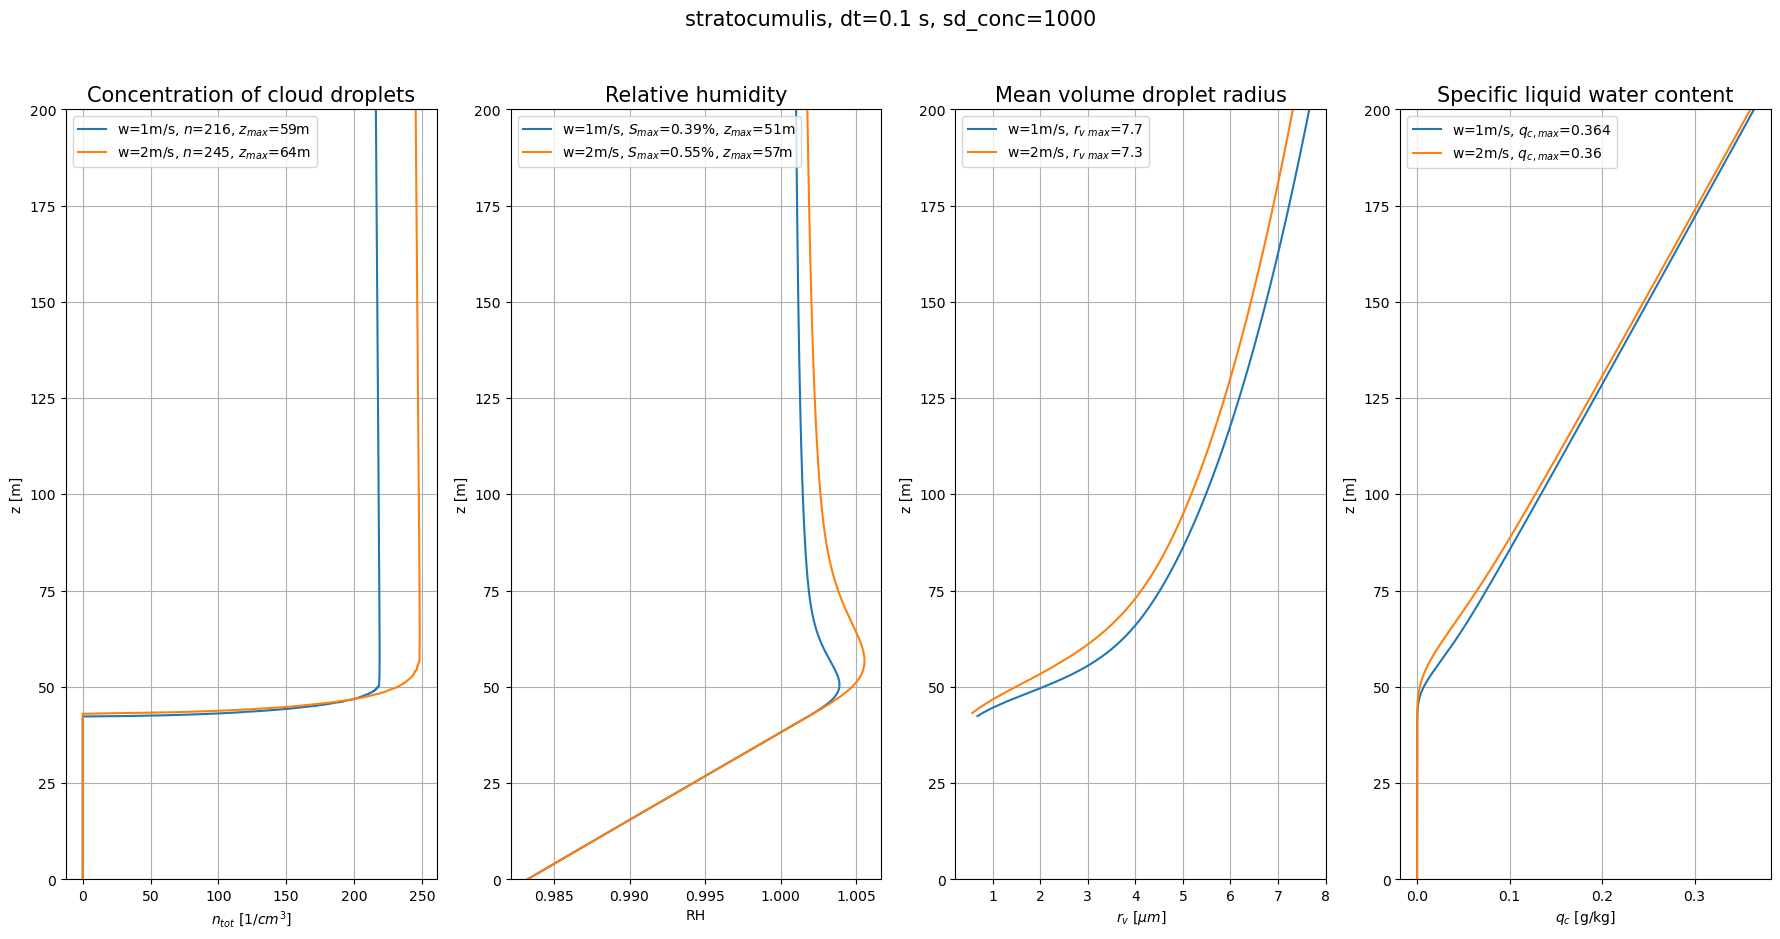

In [18]:
plt.figure(1, figsize=(22,10))
plots = []
for i in range(4):
    plots.append(plt.subplot(1,4,i+1))
    plots[i].set_ylabel('z [m]')
    plots[i].grid()
    plots[i].set_ylim(0,200)
plots[0].set_xlabel('$n_{tot}~[1/cm^3]$')
#plots[0].set_xlabel('$n_{tot}~[1/mg]$')
plots[0].set_title('Concentration of cloud droplets',fontsize=15)
plots[1].set_xlabel('RH')
plots[1].set_title('Relative humidity',fontsize=15)
plots[2].set_xlabel(r'$r_v~[\mu m]$')
plots[2].set_title('Mean volume droplet radius',fontsize=15)
plots[3].set_xlabel('$q_c$ [g/kg]')
plots[3].set_title('Specific liquid water content',fontsize=15)
legend0=[]
legend1=[]
legend2=[]
legend3=[]
for i in range(1,3):
    df=pd.read_csv('w='+str(i))
    w=i
    z=df['z [m]'].values
    n_tot=df['N [cm^-3]'].values
    RH=df['RH'].values
    rv=df['r_v [um]'].values
    LWC=df['q_c [g/kg]'].values
    plots[0].plot(n_tot ,z)
    plots[1].plot(RH, z)
    plots[2].plot(rv,z)
    plots[3].plot(LWC,z)
    legend0.append('w='+str(w)+'m/s, $n$='+str(int(round(n_tot[-1])))+', $z_{max}$='+str(int(round(z[np.argmax(n_tot)])))+'m')
    legend1.append('w='+str(w)+'m/s, $S_{max}$='+str(round(100*(max(RH)-1),2))+'%, $z_{max}$='+str(int(round(z[np.argmax(RH)])))+'m')
    legend2.append('w='+str(w)+'m/s, $r_{v~max}$='+str(round(max(rv[~np.isnan(rv)]),1)))
    legend3.append('w='+str(w)+'m/s, $q_{c,max}$='+str(round(max(LWC[~np.isnan(LWC)]),3)))
plots[0].legend(legend0, loc="upper left")
plots[1].legend(legend1, loc="upper left")
plots[2].legend(legend2, loc="upper left")
plots[3].legend(legend3, loc="upper left")
#plots[1].set_xlim(max(RH)-0.002,max(RH)+0.002)
#plots[0].set_xlim(max(n_tot)*0.7,max(n_tot)*1.05)
plt.suptitle('stratocumulis, dt=0.1 s, sd_conc=1000',fontsize=15)
plt.show()

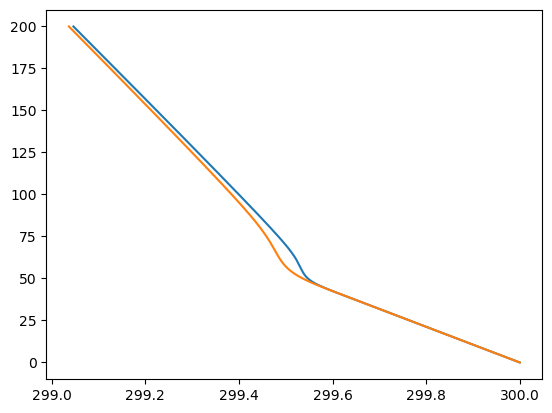

In [19]:
for i in range(1,3):
    df=pd.read_csv('w='+str(i))
    plt.plot(df['T [K]'].values,df['z [m]'].values)

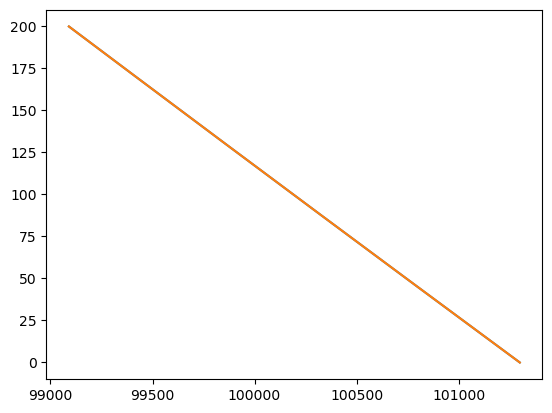

In [20]:
for i in range(1,3):
    df=pd.read_csv('w='+str(i))
    plt.plot(df['p [Pa]'].values,df['z [m]'].values)